# Explore the Data

## Load the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('data_tau_days.csv')

In [4]:
df.head()

,title,date,days
0,Deep Advances in Generative Modeling,6 points by gwulfs 5 hours ago | discuss,1
1,A Neural Network in 11 lines of Python,2 points by dekhtiar 5 hours ago | discuss,1
2,"Python, Machine Learning, and Language Wars",3 points by pmigdal 7 hours ago | discuss,1
3,Markov Chains Explained Visually,11 points by zeroviscosity 1 day ago | 1 comment,1
4,Dplython: Dplyr for Python,10 points by thenaturalist 1 day ago | 3 comm...,1


## Creating a Wordcloud

Now let us visually see which are the words that are most prominent. This requires us to find all the words in the `title` and create a frequency count for how many times the word occurs.

In [5]:
import nltk
from wordcloud import WordCloud

## Tokenization

Tokenization segments a document into its atomic elements. In this case, we are interested in tokenizing to words. 
First we need to break the sentence in to words. This process is called **tokenizatopm**

In [6]:
sentence = df["title"][0]
sentence

'Deep Advances in Generative Modeling'

In [7]:
tokens = nltk.wordpunct_tokenize(sentence)
tokens

['Deep', 'Advances', 'in', 'Generative', 'Modeling']

Let us take all the sentence in the dataframe and tokenize to find the words, and get a frequency of count of each 
words

In [8]:
frequency_words = {}

In [9]:
for data in df['title']:
    tokens = nltk.wordpunct_tokenize(data)
    for token in tokens:
        if token in frequency_words:
            count = frequency_words[token]
            count = count + 1
            frequency_words[token] = count
        else:
            frequency_words[token] = 1

In [10]:
# Let us see the frequency_words for each word occuring
frequency_words

{'!': 2,
 '"': 2,
 '#': 1,
 '&': 1,
 "'": 6,
 '(': 9,
 ')': 9,
 '***': 1,
 '+': 1,
 ',': 21,
 '-': 39,
 '.': 17,
 '.*:': 1,
 '/': 8,
 '0': 4,
 '1': 5,
 '10': 1,
 '101': 1,
 '11': 1,
 '16': 1,
 '2': 2,
 '2016': 1,
 '3': 3,
 '4': 1,
 '50': 3,
 '7': 2,
 '8M': 1,
 ':': 33,
 '?': 16,
 '???': 1,
 '@': 1,
 'A': 13,
 'API': 4,
 'AWS': 1,
 'AYLIEN': 1,
 'About': 1,
 'Access': 1,
 'Advances': 1,
 'Agree': 1,
 'Algorithms': 2,
 'All': 1,
 'Amazon': 2,
 'An': 9,
 'Analysis': 6,
 'Analytics': 1,
 'Analyze': 1,
 'Analyzing': 2,
 'Announcing': 2,
 'Answers': 1,
 'Apache': 5,
 'Apple': 1,
 'Appliance': 1,
 'Arrow': 1,
 'Art': 1,
 'Artists': 1,
 'Ask': 2,
 'Asked': 1,
 'Austin': 1,
 'Authoring': 1,
 'Auto': 1,
 'Automate': 1,
 'Automated': 1,
 'B': 2,
 'BallR': 1,
 'Bay': 1,
 'Bayesian': 7,
 'Be': 1,
 'Become': 1,
 'Beginners': 1,
 'Behavior': 1,
 'Bengio': 1,
 'Better': 1,
 'Between': 1,
 'Big': 2,
 'Biggest': 1,
 'Billion': 3,
 'Boosting': 2,
 'Bootstrap': 1,
 'Bowl': 1,
 'Building': 1,
 'CMU': 1,
 '

In [11]:
# Creating a Wordcloud
wordcloud = WordCloud()

In [12]:
wordcloud.generate_from_frequencies(frequency_words.items())

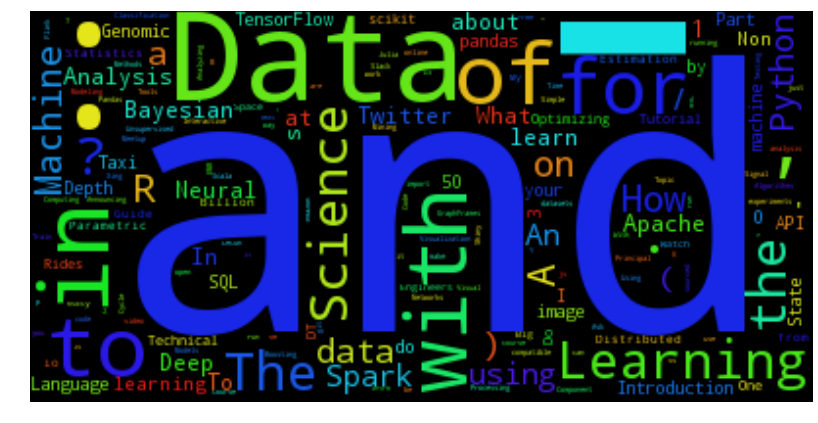

In [13]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Question - What are the two issue with this wordcloud?**

In [14]:
# Convert the dict to a dataframe
freq = pd.DataFrame.from_dict(frequency_words, orient = 'index')

In [15]:
# Let us sort them in descinding order
freq.sort_values(by = 0, ascending=False).head(10)

,0
-,39
and,36
:,33
Data,31
in,28
with,27
of,26
to,25
for,22
",",21


# Stopword Removal

Stop words are words which are filtered out before or after processing of natural language data. Though stop words usually refer to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. Some tools specifically avoid removing these stop words to support phrase search.

In [16]:
from nltk.corpus import stopwords

In [17]:
stop = stopwords.words('english')

In [18]:
stop[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

We will recreate the frequency words with two additional steps
- Remove all the stop words in our count
- Make every word lower case

In [19]:
frequency_words_wo_stop = {}
for data in df['title']:
    tokens = nltk.wordpunct_tokenize(data)
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [20]:
wordcloud.generate_from_frequencies(frequency_words_wo_stop.items())

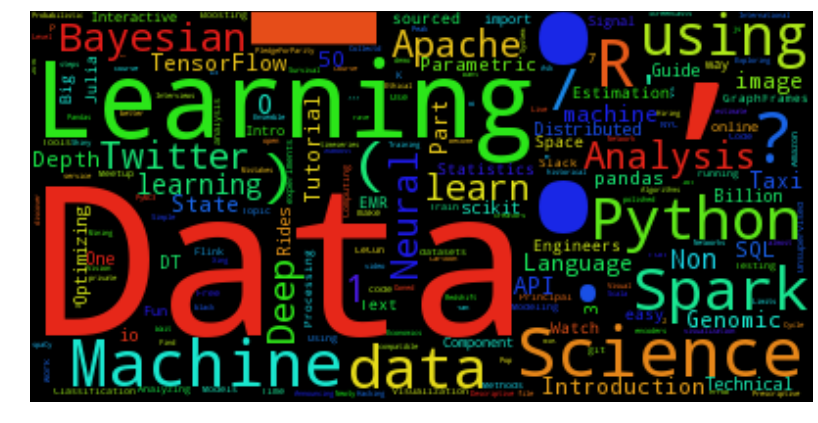

In [21]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We can also extend the stopword list with common punctuations to even reomove those from the list

In [22]:
stop.extend(('.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','/','-'))

In [23]:
frequency_words_wo_stop = {}

In [24]:
def generate_word_frequency(row):
    data = row['title']
    tokens = nltk.wordpunct_tokenize(data)
    token_list = []
    for token in tokens:
        if token.lower() not in stop:
            token_list.append(token.lower())
            if token.lower() in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token.lower()]
                count = count + 1
                frequency_words_wo_stop[token.lower()] = count
            else:
                frequency_words_wo_stop[token.lower()] = 1
    
    return ','.join(token_list)

The `apply` function takes a function as its input and applies that across all the rows or columns

In [25]:
df['tokens'] = df.apply(generate_word_frequency,axis=1)

In [26]:
df.head()

,title,date,days,tokens
0,Deep Advances in Generative Modeling,6 points by gwulfs 5 hours ago | discuss,1,"deep,advances,generative,modeling"
1,A Neural Network in 11 lines of Python,2 points by dekhtiar 5 hours ago | discuss,1,"neural,network,11,lines,python"
2,"Python, Machine Learning, and Language Wars",3 points by pmigdal 7 hours ago | discuss,1,"python,machine,learning,language,wars"
3,Markov Chains Explained Visually,11 points by zeroviscosity 1 day ago | 1 comment,1,"markov,chains,explained,visually"
4,Dplython: Dplyr for Python,10 points by thenaturalist 1 day ago | 3 comm...,1,"dplython,dplyr,python"


In [27]:
wordcloud.generate_from_frequencies(frequency_words_wo_stop.items())

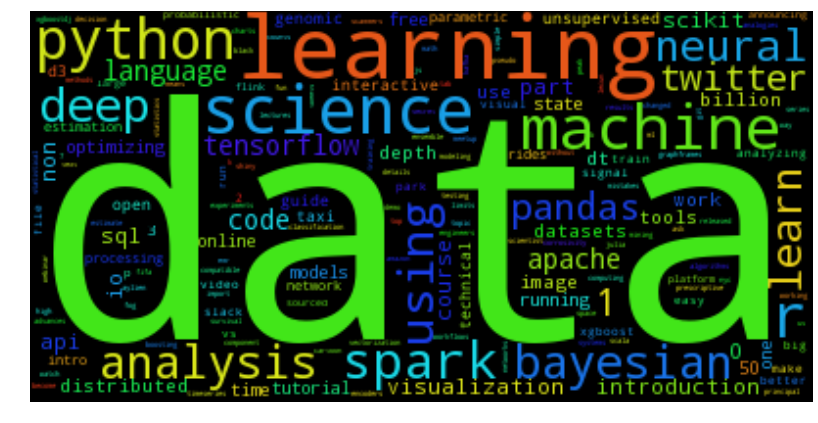

In [28]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Exercise**: Find the frequency count for each word without stopword

## Stemming

*An linguistic morphology and information retrieval, stemming is the process for reducing inflected (or sometimes derived) words to their stem, base or root form—generally a written word form. The stem need not be identical to the morphological root of the word; it is usually sufficient that related words map to the same stem, even if this stem is not in itself a valid root. Algorithms for stemming have been studied in computer science since the 1960s. Many search engines treat words with the same stem as synonyms as a kind of query expansion, a process called conflation.*

Stemming words is another common NLP technique to reduce topically similar words to their root. For example, “stemming,” “stemmer,” “stemmed,” all have similar meanings; stemming reduces those terms to “stem.” This is important for topic modeling, which would otherwise view those terms as separate entities and reduce their importance in the model. Stemming programs are commonly referred to as stemming algorithms or stemmers.

Like stopping, stemming is flexible and some methods are more aggressive. The Porter stemming algorithm is the most widely used method. To implement a Porter stemming algorithm, import the Porter Stemmer module from NLTK:

In [29]:
from nltk.stem.porter import PorterStemmer

In [30]:
porter_stemmer = PorterStemmer()

In [31]:
porter_stemmer.stem('dividing')

'divid'

## Lemmatization

Lemmatisation (or lemmatization) in linguistics, is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. In computational linguistics, lemmatisation is the algorithmic process of determining the lemma for a given word. Since the process may involve complex tasks such as understanding context and determining the part of speech of a word in a sentence (requiring, for example, knowledge of the grammar of a language) it can be a hard task to implement a lemmatiser for a new language.

In many languages, words appear in several inflected forms. For example, in English, the verb ‘to walk’ may appear as ‘walk’, ‘walked’, ‘walks’, ‘walking’. The base form, ‘walk’, that one might look up in a dictionary, is called the lemma for the word. The combination of the base form with the part of speech is often called the lexeme of the word.

Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

We will use a corpus to do the Lemmatization. Let us **download the wordnet corpora using nltk.download()**

In [32]:
from nltk.stem import WordNetLemmatizer

In [33]:
wordnet_lemmatizer = WordNetLemmatizer()

In [34]:
wordnet_lemmatizer.lemmatize('are')

'are'

In [35]:
wordnet_lemmatizer.lemmatize('is')

'is'

But we know that the root of `are` and `is` , is be. The reason why we see `are` and `is` as is , is because we
have to define them as verbs

In [36]:
wordnet_lemmatizer.lemmatize('is',pos='v')

'be'

In [37]:
def stem_title(data):
    return porter_stemmer.stem(data['title'])

In [38]:
def lemmatize_title(data):
    return wordnet_lemmatizer.lemmatize(data['title'])

In [39]:
df['stem'] = df.apply(stem_title,axis=1)

In [40]:
df.head()

,title,date,days,tokens,stem
0,Deep Advances in Generative Modeling,6 points by gwulfs 5 hours ago | discuss,1,"deep,advances,generative,modeling",Deep Advances in Generative Model
1,A Neural Network in 11 lines of Python,2 points by dekhtiar 5 hours ago | discuss,1,"neural,network,11,lines,python",A Neural Network in 11 lines of Python
2,"Python, Machine Learning, and Language Wars",3 points by pmigdal 7 hours ago | discuss,1,"python,machine,learning,language,wars","Python, Machine Learning, and Language War"
3,Markov Chains Explained Visually,11 points by zeroviscosity 1 day ago | 1 comment,1,"markov,chains,explained,visually",Markov Chains Explained Visu
4,Dplython: Dplyr for Python,10 points by thenaturalist 1 day ago | 3 comm...,1,"dplython,dplyr,python",Dplython: Dplyr for Python


In [41]:
df['lemma'] = df.apply(lemmatize_title,axis=1)

In [42]:
df.head()

,title,date,days,tokens,stem,lemma
0,Deep Advances in Generative Modeling,6 points by gwulfs 5 hours ago | discuss,1,"deep,advances,generative,modeling",Deep Advances in Generative Model,Deep Advances in Generative Modeling
1,A Neural Network in 11 lines of Python,2 points by dekhtiar 5 hours ago | discuss,1,"neural,network,11,lines,python",A Neural Network in 11 lines of Python,A Neural Network in 11 lines of Python
2,"Python, Machine Learning, and Language Wars",3 points by pmigdal 7 hours ago | discuss,1,"python,machine,learning,language,wars","Python, Machine Learning, and Language War","Python, Machine Learning, and Language Wars"
3,Markov Chains Explained Visually,11 points by zeroviscosity 1 day ago | 1 comment,1,"markov,chains,explained,visually",Markov Chains Explained Visu,Markov Chains Explained Visually
4,Dplython: Dplyr for Python,10 points by thenaturalist 1 day ago | 3 comm...,1,"dplython,dplyr,python",Dplython: Dplyr for Python,Dplython: Dplyr for Python


In [43]:
df.tail()

,title,date,days,tokens,stem,lemma
175,Parallel scikit-learn on YARN,5 points by stijntonk 39 days ago | discuss,39,"parallel,scikit,learn,yarn",Parallel scikit-learn on YARN,Parallel scikit-learn on YARN
176,Meetup: Free Live Webinar on Prescriptive Anal...,2 points by ann928 32 days ago | discuss,32,"meetup,free,live,webinar,prescriptive,analytic...",Meetup: Free Live Webinar on Prescriptive Anal...,Meetup: Free Live Webinar on Prescriptive Anal...
177,Access to VK.com (Vkontakte) API via R,2 points by dementiy 32 days ago | discuss,32,"access,vk,com,vkontakte,api,via,r",Access to VK.com (Vkontakte) API via R,Access to VK.com (Vkontakte) API via R
178,\tDeep Learning Tutorial by Y. LeCun and Y. B...,15 points by Anon84 50 days ago | 1 comment,50,"deep,learning,tutorial,lecun,bengio",\tDeep Learning Tutorial by Y. LeCun and Y. B...,\tDeep Learning Tutorial by Y. LeCun and Y. B...
179,Machine Learning Meets Economics,20 points by nicolaskruchten 55 days ago | di...,55,"machine,learning,meets,economics",Machine Learning Meets Econom,Machine Learning Meets Economics


**Note: Stemming and Lemma in the context of Recall ** 

# Part of Speech (POS) tagging

https://displacy.spacy.io/displacy/index.html?full=Click+the+button+to+see+this+sentence+in+displaCy.

Let us go back to school. Schools commonly teach that there are 9 parts of speech in English: noun, verb, article, adjective, preposition, pronoun, adverb, conjunction, and interjection.

Part-of-speech tagging is one of the most important text analysis tasks used to classify words into their part-of-speech and label them according the tagset which is a collection of tags used for the pos tagging. Part-of-speech tagging also known as word classes or lexical categories. Here is the definition from wikipedia:

In corpus linguistics, part-of-speech tagging (POS tagging or POST), also called grammatical tagging or word-category disambiguation, is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech, based on both its definition, as well as its context—i.e. relationship with adjacent and related words in a phrase, sentence, or paragraph. A simplified form of this is commonly taught to school-age children, in the identification of words as nouns, verbs, adjectives, adverbs, etc.

Once performed by hand, POS tagging is now done in the context of computational linguistics, using algorithms which associate discrete terms, as well as hidden parts of speech, in accordance with a set of descriptive tags. POS-tagging algorithms fall into two distinctive groups: rule-based and stochastic. E. Brill’s tagger, one of the first and most widely used English POS-taggers, employs rule-based algorithms.

In [44]:
text = 'Calvin harris is a great musician'

In [45]:
text_tokens = nltk.wordpunct_tokenize(text)

In [46]:
text_tokens

['Calvin', 'harris', 'is', 'a', 'great', 'musician']

We will download **from nltk download averaged perceptron tagger** to do POS tagging

In [47]:
nltk.pos_tag(text_tokens)

[('Calvin', 'NNP'),
 ('harris', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('musician', 'NN')]

**Tag | Meaning	| English Examples**

Tag  | Meaning    | Examples
---- |----------- | --------------------
ADJ	 | adjective  | new, good, high, special, big, local
ADP	 | adposition |	on, of, at, with, by, into, under
ADV	 | adverb	  | really, already, still, early, now
CONJ | conjunction|	and, or, but, if, while, although
DET	 | determiner | the, a, some, most, every, no, which
NOUN | noun	      | year, home, costs, time, Africa
NUM	 | numeral	  | twenty-four, fourth, 1991, 14:24
PRT	 | particle	  | at, on, out, over per, that, up, with
PRON | pronoun	  | he, their, her, its, my, I, us
VERB | verb	      | is, say, told, given, playing, would
0	 | punctuation marks |	. , ; !
X	 | other	  | ersatz, esprit, dunno, gr8, univeristy


###  Let us generate POS tags for each title

In [48]:
def get_pos_tags(data):
    return nltk.pos_tag(nltk.wordpunct_tokenize(data['title']))

In [49]:
df['pos_tags'] = df.apply(get_pos_tags,axis=1)

In [50]:
df.head()

,title,date,days,tokens,stem,lemma,pos_tags
0,Deep Advances in Generative Modeling,6 points by gwulfs 5 hours ago | discuss,1,"deep,advances,generative,modeling",Deep Advances in Generative Model,Deep Advances in Generative Modeling,"[(Deep, JJ), (Advances, NNS), (in, IN), (Gener..."
1,A Neural Network in 11 lines of Python,2 points by dekhtiar 5 hours ago | discuss,1,"neural,network,11,lines,python",A Neural Network in 11 lines of Python,A Neural Network in 11 lines of Python,"[(A, DT), (Neural, NNP), (Network, NNP), (in, ..."
2,"Python, Machine Learning, and Language Wars",3 points by pmigdal 7 hours ago | discuss,1,"python,machine,learning,language,wars","Python, Machine Learning, and Language War","Python, Machine Learning, and Language Wars","[(Python, NNP), (,, ,), (Machine, NNP), (Learn..."
3,Markov Chains Explained Visually,11 points by zeroviscosity 1 day ago | 1 comment,1,"markov,chains,explained,visually",Markov Chains Explained Visu,Markov Chains Explained Visually,"[(Markov, NNP), (Chains, NNP), (Explained, VBD..."
4,Dplython: Dplyr for Python,10 points by thenaturalist 1 day ago | 3 comm...,1,"dplython,dplyr,python",Dplython: Dplyr for Python,Dplython: Dplyr for Python,"[(Dplython, NN), (:, :), (Dplyr, NNP), (for, I..."


## Entity Extraction

** Now using pos tags we can extract entities i.e find the primary focus of the sentence **

 <img src="img/entity_extraction.png" width=400>

### We already have POS tags - now all we need is chunking

The basic technique we will use for entity detection is chunking, which segments and labels multi-token sequences as illustrated in 2.1. The smaller boxes show the word-level tokenization and part-of-speech tagging, while the large boxes show higher-level chunking. Each of these larger boxes is called a chunk. Like tokenization, which omits whitespace, chunking usually selects a subset of the tokens. Also like tokenization, the pieces produced by a chunker do not overlap in the source text.

<img src="img/chunk-segmentation.png" width=400/>


Named Entity-Type | Examples
------------------| -------------------------
ORGANIZATION	| Georgia-Pacific Corp., WHO
PERSON	        | Eddy Bonte, President Obama
LOCATION	    | Murray River, Mount Everest
DATE	        | June, 2008-06-29
TIME	        | two fifty a m, 1:30 p.m.
MONEY	        | 175 million Canadian Dollars, GBP 10.40
PERCENT	        |  twenty pct, 18.75 %
FACILITY	    | Washington Monument, Stonehenge
GPE	            | South East Asia, Midlothian

To do the entity identification, we will **download the maxent chunker and words corpora **

In [51]:
df.pos_tags[0]

[('Deep', 'JJ'),
 ('Advances', 'NNS'),
 ('in', 'IN'),
 ('Generative', 'NNP'),
 ('Modeling', 'NNP')]

In [ ]:
ne_tree = nltk.ne_chunk(df.pos_tags[0],binary=True)
ne_tree

In [ ]:
for x in ne_tree:
    print(x)

In [ ]:
# we want only the NE ones and when print the type we see that it is a tree
# so we need to iterate over the tree and get the NE

In [ ]:
for x in ne_tree:
    print(type(x),x)
    if type(x) == nltk.tree.Tree:
        if(x.label()) == 'NE':
            print(x)
        

In [ ]:
def get_entities(row):
    entities=[]
    chunked_tree = nltk.ne_chunk(row.pos_tags,binary=True)
    for nodes in chunked_tree:
        if type(nodes) == nltk.tree.Tree:
            if(nodes.label()) == 'NE':
                print("Before zip",nodes.leaves())
                zipped_list = list(zip(*nodes.leaves()))
                print("After zip",zipped_list)
                entities.append(' '.join(zipped_list[0]))
    return entities

In [ ]:
df['named_entities'] = df.apply(get_entities,axis=1)

In [ ]:
df.head()

** Now that we have entities, we can understand the statements better **

In [ ]:
df.tail()

In [ ]:
df.to_csv('data_tau_ta.csv',index=False)